# Housing Price Prediction using a Neural Network

## Objective
In this exercise, you will:
1. Create a synthetic dataset for housing prices based on a linear equation.
2. Build and train a simple neural network with one neuron to predict housing prices.

---

## Step 1: Import Libraries
Let's start by importing the necessary libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

---

## Step 2: Create a Synthetic Dataset
We will create a dataset for housing prices that follows the equation

$\text{price}$ = $\text{number of bedrooms}$ $\times  x$ + $\text{base price}$


In [2]:
# Number of samples
n_samples = 1000

# Generate random number of bedrooms between 1 and 5
bedrooms = np.random.randint(1, 6, n_samples)

# Constants for the equation
x = 0.5  # The price added per bedroom in onehundred thousands
base_price = 1  # Base price of a house in onehundred thousands

# Generate housing prices based on the equation
prices = bedrooms * x + base_price

# Create a DataFrame
df = pd.DataFrame({'bedrooms': bedrooms, 'price': prices})

# Show the first few rows
df.head()

,bedrooms,price
0,2,2.0
1,2,2.0
2,1,1.5
3,5,3.5
4,1,1.5


---

## Step 3: Visualize the Data
Plot the data to visualize the relationship between the number of bedrooms and the price.


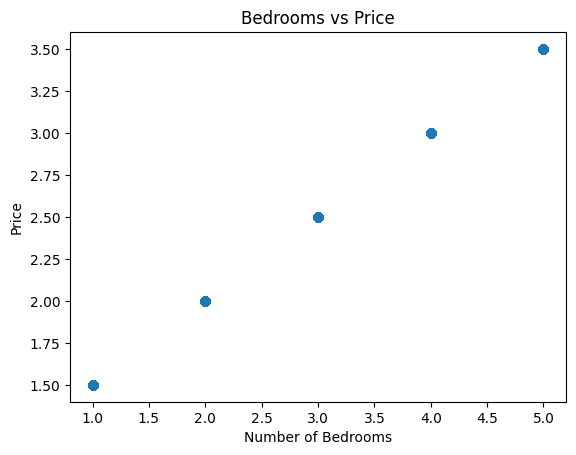

In [3]:
plt.scatter(df['bedrooms'], df['price'])
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.title('Bedrooms vs Price')
plt.show()


---

## Step 4: Preprocess the Data
Split the data into features (`X`) and labels (`y`), and then into training and testing sets.


In [4]:
# Features and Labels
X = df['bedrooms']
y = df['price']

print(f"X has shape: {X.shape}")
print(f"Y has shape: {y.shape}")
# TODO Split the data
# YOUR CODE HERE

# set a random seed for reproducibility
random_state=10

# split the data into training set (70%) and test set (30%)

from sklearn.model_selection import train_test_split

training_set, test_set = train_test_split (df, train_size=0.7, random_state=random_state)


training_set.head()
print(f"training set has shape: {training_set.shape}")

# features and labels for training and test set
training_X= training_set['bedrooms']
training_y= training_set['price']

test_X= test_set['bedrooms']
test_y= test_set['price']

X has shape: (1000,)
Y has shape: (1000,)
training set has shape: (700, 2)


---

## Step 5: Build a Neural Network
Build a simple neural network with one neuron to predict the house prices.
Pick an optimizer and a loss function that suits this problem.


In [5]:
# TODO Create the model

model =tf.keras.Sequential([
    tf.keras.Input(shape=(1,)),
    tf.keras.layers.Dense(units=1)
])


# TODO Compile the model
model.compile(optimizer='sgd', loss='mean_squared_error')

# TODO print a Summary of the model

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

---

## Step 6: Train the Model
Train the model using the training data.


In [6]:
# TODO Train the model

trained_model= model.fit(training_X,training_y, epochs=500)



Epoch 1/500
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6769
Epoch 2/500
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1654 
Epoch 3/500
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1418
Epoch 4/500
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1313
Epoch 5/500
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1120
Epoch 6/500
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0994  
Epoch 7/500
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0853 
Epoch 8/500
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0742 
Epoch 9/500
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0615 
Epoch 10/500
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0558 
Epoch 11/500
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0498 
Epoch 12/500
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0424 
Epoch 13/500
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0371  
Epoch 14/500
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0347 
Epoch 15/500
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss:

---

## Step 7: Evaluate the Model
Evaluate the model using the test data and plot its prediction.


Evaluate on test data
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.4414e-12 
test loss, test acc: 2.4412353649000407e-12
Generate predictions 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
predictions shape: (300, 1)


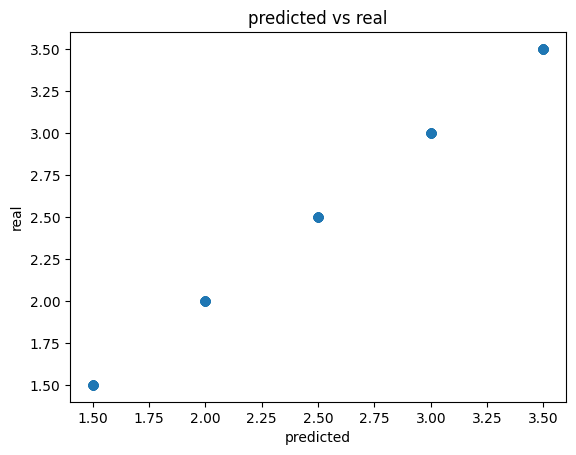

In [28]:
# TODO Evaluate the model on the test data using the model.evaluate() function
print("Evaluate on test data")
results = model.evaluate(test_X, test_y)
print("test loss, test acc:", results)


# Generate predictions on new data using `predict`
print("Generate predictions ")
predictions = model.predict(test_X)
print("predictions shape:", predictions.shape)

# plot real vs. predicted

plt.scatter(predictions, test_y)
plt.xlabel('predicted')
plt.ylabel('real')
plt.title('predicted vs real')
plt.show()


def plot_predictions(data, title):
    plt.figure(figsize=(12, 6))
    plt.plot(data['actual'], label='Actual Values', color='red')
    plt.plot(data['prediction'], label='Predicted Values', color='blue')
    plt.title(title)
    plt.xlabel('Case Number')
    plt.ylabel('Price in 1.000 USD')
    plt.legend()
    plt.show()

plot_predictions(, 'Predicted and Actual Values for the Training Data')




# Step 8: Optional
Go back to the start and experiment what happens if instead of representing a price of a house costing onehundred thousand by a 1 we use the raw number 100,000 instead.

Try to explain what happened and why.